In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt


In [3]:
#Upload Google Political Ads  file via Priorities USA and mount Google Drive to access csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#problem reading at line at 37505
maga = pd.read_csv('/content/google-political-ads-creative-stats.csv', engine= 'python')  
maga

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_EUR,Spend_Range_Max_EUR,Spend_Range_Min_INR,Spend_Range_Max_INR,Spend_Range_Min_BGN,Spend_Range_Max_BGN,Spend_Range_Min_HRK,Spend_Range_Max_HRK,Spend_Range_Min_CZK,Spend_Range_Max_CZK,Spend_Range_Min_DKK,Spend_Range_Max_DKK,Spend_Range_Min_HUF,Spend_Range_Max_HUF,Spend_Range_Min_PLN,Spend_Range_Max_PLN,Spend_Range_Min_RON,Spend_Range_Max_RON,Spend_Range_Min_SEK,Spend_Range_Max_SEK,Spend_Range_Min_GBP,Spend_Range_Max_GBP,Spend_Range_Min_ILS,Spend_Range_Max_ILS,Spend_Range_Min_NZD,Spend_Range_Max_NZD,Spend_Range_Min_TWD,Spend_Range_Max_TWD,Spend_Range_Min_AUD,Spend_Range_Max_AUD
0,CR104193501419274240,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-25,31.0,≤ 10k,NaN,2020-10-26T18:45:00Z,2020-11-25T18:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Italy, Bari, Province of Milan, Naples, Rome, ...",Not targeted,0.0,100.0,0.0,50.0,0.0,250.0,0.0,25.0,0.0,100.0,0.0,1000.0,0.0,500.0,0.0,7500.0,0.0,100.0,0.0,75.0,0.0,750.0,0.0,50.0,0.0,250.0,0.0,200.0,0.0,3000.0,0.0,150.0
1,CR109957691127889920,https://transparencyreport.google.com/politica...,Video,"EU, IT",AR100125170957549568,Azione,NaN,2020-12-02,2020-12-03,2.0,≤ 10k,NaN,2020-12-02T17:00:00Z,2020-12-03T08:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Italy, Abruzzo,Italy, Aosta,Italy, Apulia,Ital...",Not targeted,0.0,100.0,0.0,50.0,0.0,250.0,0.0,25.0,0.0,100.0,0.0,1000.0,0.0,500.0,0.0,7500.0,0.0,100.0,0.0,75.0,0.0,750.0,0.0,50.0,0.0,250.0,0.0,200.0,0.0,3000.0,0.0,150.0
2,CR111129083328331776,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-06-28,2020-09-03,35.0,1M-10M,NaN,2020-06-28T10:00:00Z,2020-09-03T13:15:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Italy, Province of Milan, Rome, Abruzzo,Italy,...",Not targeted,1000.0,50000.0,500.0,30000.0,125000.0,250000.0,250.0,10000.0,1500.0,75000.0,10000.0,500000.0,5000.0,250000.0,75000.0,3750000.0,1000.0,50000.0,750.0,37500.0,7500.0,375000.0,500.0,25000.0,2500.0,125000.0,1500.0,75000.0,30000.0,1500000.0,1500.0,50000.0
3,CR112145169511350272,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-02,8.0,10k-100k,NaN,2020-10-26T09:15:00Z,2020-11-03T06:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Italy, Bari, Province of Milan, Naples, Rome, ...",Not targeted,0.0,100.0,0.0,50.0,250.0,2500.0,0.0,25.0,0.0,100.0,0.0,1000.0,0.0,500.0,0.0,7500.0,0.0,100.0,0.0,75.0,0.0,750.0,0.0,50.0,0.0,250.0,0.0,200.0,0.0,3000.0,0.0,150.0
4,CR112255773509156864,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2021-01-28,2021-02-04,8.0,100k-1M,NaN,2021-01-28T17:30:00Z,2021-02-05T07:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Italy, Abruzzo,Italy, Aosta,Italy, Apulia,Ital...",Not targeted,100.0,1000.0,50.0,500.0,2500.0,125000.0,250.0,10000.0,1500.0,75000.0,1000.0,10000.0,500.0,5000.0,75000.0,3750000.0,1000.0,50000.0,750.0,37500.0,750.0,7500.0,50.0,500.0,250.0,2500.0,200.0,1500.0,3000.0,30000.0,150.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310268,CR498892749584465920,https://transparencyreport.google.com/politica...,Video,US,AR28939146043064320,MCSALLY FOR SENATE INC,NaN,2020-05-14,2020-06-04,20.0,10k-100k,100-1k,2020-05-15T00:30:00Z,2020-06-05T03:45:00Z,"18-24, 25-34, 45-54, 55-64, ≥65, Unknown age","Male,

1B) Preliminary Exploration 

In [11]:
#Identify columns
maga.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310273 entries, 0 to 310272
Data columns (total 50 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Ad_ID                   310273 non-null  object 
 1   Ad_URL                  310273 non-null  object 
 2   Ad_Type                 310272 non-null  object 
 3   Regions                 310272 non-null  object 
 4   Advertiser_ID           310272 non-null  object 
 5   Advertiser_Name         310272 non-null  object 
 6   Ad_Campaigns_List       0 non-null       float64
 7   Date_Range_Start        310272 non-null  object 
 8   Date_Range_End          310272 non-null  object 
 9   Num_of_Days             310272 non-null  float64
 10  Impressions             310272 non-null  object 
 11  Spend_USD               244291 non-null  object 
 12  First_Served_Timestamp  310264 non-null  object 
 13  Last_Served_Timestamp   310264 non-null  object 
 14  Age_Targeting       

In [23]:
maga.columns

Index(['Ad_ID', 'Ad_URL', 'Ad_Type', 'Regions', 'Advertiser_ID',
       'Advertiser_Name', 'Ad_Campaigns_List', 'Date_Range_Start',
       'Date_Range_End', 'Num_of_Days', 'Impressions', 'Spend_USD',
       'First_Served_Timestamp', 'Last_Served_Timestamp', 'Age_Targeting',
       'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
       'Spend_Range_Min_USD', 'Spend_Range_Max_USD', 'Spend_Range_Min_EUR',
       'Spend_Range_Max_EUR', 'Spend_Range_Min_INR', 'Spend_Range_Max_INR',
       'Spend_Range_Min_BGN', 'Spend_Range_Max_BGN', 'Spend_Range_Min_HRK',
       'Spend_Range_Max_HRK', 'Spend_Range_Min_CZK', 'Spend_Range_Max_CZK',
       'Spend_Range_Min_DKK', 'Spend_Range_Max_DKK', 'Spend_Range_Min_HUF',
       'Spend_Range_Max_HUF', 'Spend_Range_Min_PLN', 'Spend_Range_Max_PLN',
       'Spend_Range_Min_RON', 'Spend_Range_Max_RON', 'Spend_Range_Min_SEK',
       'Spend_Range_Max_SEK', 'Spend_Range_Min_GBP', 'Spend_Range_Max_GBP',
       'Spend_Range_Min_ILS', 'Spend_R

In [13]:
#What's the breakdown per column
maga.value_counts

<bound method DataFrame.value_counts of                        Ad_ID  ... Spend_Range_Max_AUD
0       CR104193501419274240  ...               150.0
1       CR109957691127889920  ...               150.0
2       CR111129083328331776  ...             50000.0
3       CR112145169511350272  ...               150.0
4       CR112255773509156864  ...              1500.0
...                      ...  ...                 ...
310268  CR498892749584465920  ...              1500.0
310269  CR499011153242882048  ...             50000.0
310270   CR49915422719344640  ...              1500.0
310271    CR4993981813358592  ...               150.0
310272  CR499452950758817792  ...                 NaN

[310273 rows x 50 columns]>

In [14]:
maga.describe()

,Ad_Campaigns_List,Num_of_Days,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_EUR,Spend_Range_Max_EUR,Spend_Range_Min_INR,Spend_Range_Max_INR,Spend_Range_Min_BGN,Spend_Range_Max_BGN,Spend_Range_Min_HRK,Spend_Range_Max_HRK,Spend_Range_Min_CZK,Spend_Range_Max_CZK,Spend_Range_Min_DKK,Spend_Range_Max_DKK,Spend_Range_Min_HUF,Spend_Range_Max_HUF,Spend_Range_Min_PLN,Spend_Range_Max_PLN,Spend_Range_Min_RON,Spend_Range_Max_RON,Spend_Range_Min_SEK,Spend_Range_Max_SEK,Spend_Range_Min_GBP,Spend_Range_Max_GBP,Spend_Range_Min_ILS,Spend_Range_Max_ILS,Spend_Range_Min_NZD,Spend_Range_Max_NZD,Spend_Range_Min_TWD,Spend_Range_Max_TWD,Spend_Range_Min_AUD,Spend_Range_Max_AUD
count,0.0,310272.000000,310272.000000,309821.000000,310272.000000,309579.000000,310272.000000,293449.000000,310272.000000,306264.000000,310272.000000,307867.000000,310272.000000,309098.000000,310272.000000,309654.000000,3.102720e+05,3.080290e+05,310272.000000,308141.000000,310272.000000,307071.000000,310272.000000,309708.000000,310272.000000,309525.000000,310272.000000,309608.000000,310272.000000,309818.000000,3.102720e+05,3.098430e+05,310272.000000,309590.000000
mean,NaN,13.093718,383.428733,6776.868579,308.677709,5382.744308,19203.035562,59005.788059,601.538731,3350.923223,2256.158467,20253.428591,8162.828099,103251.182473,2414.215591,38883.192208,1.060953e+05,9.817418e+05,1348.907410,12856.316751,1440.613397,11107.540520,3383.552174,56194.740691,283.572962,4276.961635,1282.733376,20218.923607,583.337846,10207.778438,1.120901e+04,2.014938e+05,561.102033,6679.188766
std,NaN,27.107426,4362.235182,16971.042538,3217.049164,11530.445131,60061.990818,71102.747233,3126.531385,5418.877261,14914.980579,34361.468300,69671.076907,204382.878222,25322.666000,90255.300000,7.197013e+05,1.697557e+06,9345.936295,22450.243499,8546.540184,17873.743506,36350.052286,133140.225886,2790.296638,9418.300412,13129.913157,45919.945700,6565.063119,25513.800030,1.281451e+05,5.070099e+05,5330.120124,16781.557424
min,NaN,1.000000,0.000000,100.000000,0.000000,50.000000,0.000000,250.000000,0.000000,25.000000,0.000000,100.000000,0.000000,1000.000000,0.000000,500.000000,0.000000e+00,7.500000e+03,0.000000,100.000000,0.000000,75.000000,0.000000,750.000000,0.000000,50.000000,0.000000,250.000000,0.000000,200.000000,0.000000e+00,3.000000e+03,0.000000,150.000000
25%,NaN,3.000000,0.000000,100.000000,0.000000,50.000000,0.000000,250.000000,0.000000,25.000000,0.000000,100.000000,0.000000,1000.000000,0.000000,500.000000,0.000000e+00,7.500000e+03,0.000000,100.000000,0.000000,75.000000,0.000000,750.000000,0.000000,50.000000,0.000000,250.000000,0.000000,200.000000,0.000000e+00,3.000000e+03,0.000000,150.000000
50%,NaN,6.000000,0.000000,100.000000,0.000000,50.000000,250.000000,2500.000000,25.000000,250.000000,100.000000,1500.000000,0.000000,1000.000000,0.000000,500.000000,0.000000e+00,7.500000e+03,0.000000,100.000000,75.000000,750.000000,0.000000,750.000000,0.000000,50.000000,0.000000,250.000000,0.000000,200.000000,0.000000e+00,3.000000e+03,0.000000,150.000000
75%,NaN,14.000000,100.000000,1000.000000,50.000000,500.000000,2500.000000,125000.000000,250.000000,10000.000000,1500.000000,75000.000000,1000.000000,10000.000000,500.000000,5000.000000,7.500000e+04,7.500000e+04,100.000000,1000.000000,750.000000,37500.000000,750.000000,7500.000000,50.000000,500.000000,250.000000,2500.000000,200.000000,1500.000000,3.000000e+03,3.000000e+04,150.000000,1500.000000
max,NaN,780.000000,100000.000000,100000.000000,60000.000000,60000.000000,250000.000000,250000.000000,25000.000000,25000.000000,150000.000000,150000.000000,1000000.000000,1000000.000000,500000.000000,500000.000000,7.500000e+06,7.500000e+06,100000.000000,100000.000000,75000.000000,75000.000000,750000.000000,750000.000000,50000.000000,50000.000000,250000.000000,250000.000000,150000.000000,150000.000000,3.000000e+06,3.000000e+06,100000.000000,100000.000000


In [18]:
maga.value_counts('Advertiser_Name').head(50)

Advertiser_Name
BIDEN FOR PRESIDENT                                                   58353
DONALD J. TRUMP FOR PRESIDENT, INC.                                   27430
Koalicyjny Komitet Wyborczy Koalicja Obywatelska PO .N iPL Zieloni    22777
REPUBLICAN NATIONAL COMMITTEE                                         15252
JEXAN LLC                                                             12186
DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE                      8124
CONSERVATIVE BUZZ LLC                                                  6433
BEACHSIDE MEDIA INC                                                    6154
TULSI NOW                                                              5564
NRCC                                                                   5369
INDEPENDENCE USA PAC                                                   4938
NRSC                                                                   4575
PETE FOR AMERICA, INC.                                                 3

Review top 50, Flag MAGA/GOP, and group under MAGA: 
Threshold: 


1.   DONALD J. TRUMP FOR PRESIDENT, INC.
2.   REPUBLICAN NATIONAL COMMITTEE
3. NRCC (Source: https://www.nrcc.org/about/)
4. NRSC (Source: https://www.nrsc.org/about-us/)
5. Conservative Buzz, LCC. (Source:  https://www.engadget.com/2019-11-11-google-political-ads-polls-email-collection.html)
6. Beachside Media (Source: https://transparencyreport.google.com/political-ads/advertiser/AR24814465610416128)
7. Senate Leadership Fund (Source: https://www.senateleadershipfund.org/about/)
8. AMERICANS FOR TAX REFORM (Source: https://www.atr.org/)
9. Committee To Defend the President (Source: https://www.factcheck.org/2020/02/committee-to-defend-the-president-2/)
10. PUBLIC ADVOCATE OF THE UNITED STATES (Source: https://www.publicadvocateusa.org/ )
11. CLEARPATH ACTION FUND, INC. (Elects GOP candidats supporting "clean energy" like nuclear ~Source: https://clearpathactionfund.org/)

Notes: Reviewed those not intuitively associated with MAGA movement 

*   Confirmed Progressive: https://fusewashington.org/news/fuses-2020-endorsements
*    Top 23 spenders spent more than $2K







In [22]:
maga.corr()

,Ad_Campaigns_List,Num_of_Days,Spend_Range_Min_USD,Spend_Range_Max_USD,Spend_Range_Min_EUR,Spend_Range_Max_EUR,Spend_Range_Min_INR,Spend_Range_Max_INR,Spend_Range_Min_BGN,Spend_Range_Max_BGN,Spend_Range_Min_HRK,Spend_Range_Max_HRK,Spend_Range_Min_CZK,Spend_Range_Max_CZK,Spend_Range_Min_DKK,Spend_Range_Max_DKK,Spend_Range_Min_HUF,Spend_Range_Max_HUF,Spend_Range_Min_PLN,Spend_Range_Max_PLN,Spend_Range_Min_RON,Spend_Range_Max_RON,Spend_Range_Min_SEK,Spend_Range_Max_SEK,Spend_Range_Min_GBP,Spend_Range_Max_GBP,Spend_Range_Min_ILS,Spend_Range_Max_ILS,Spend_Range_Min_NZD,Spend_Range_Max_NZD,Spend_Range_Min_TWD,Spend_Range_Max_TWD,Spend_Range_Min_AUD,Spend_Range_Max_AUD
Ad_Campaigns_List,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_of_Days,NaN,1.000000,0.139366,0.147191,0.149440,0.148025,0.154010,0.156970,0.171440,0.155783,0.162744,0.154673,0.151928,0.147266,0.145278,0.145222,0.162041,0.151838,0.163384,0.154435,0.165775,0.154796,0.147676,0.146818,0.149810,0.145434,0.147225,0.144545,0.141430,0.146650,0.140914,0.149373,0.151618,0.145867
Spend_Range_Min_USD,NaN,0.139366,1.000000,0.378333,0.897393,0.318654,0.263763,0.617007,0.449749,0.699138,0.553912,0.720028,0.778248,0.804867,0.922944,0.343477,0.572683,0.727926,0.587111,0.732731,0.487933,0.697048,0.943588,0.352228,0.880994,0.329165,0.906426,0.335981,0.992543,0.371755,0.984996,0.359884,0.901183,0.365150
Spend_Range_Max_USD,NaN,0.147191,0.378333,1.000000,0.306092,0.844945,0.787844,0.546544,0.478739,0.640266,0.387071,0.669891,0.337117,0.777257,0.323197,0.921446,0.378476,0.680347,0.372487,0.686668,0.421466,0.638103,0.329991,0.942287,0.321170,0.870396,0.320696,0.900208,0.369953,0.993841,0.371130,0.989184,0.358848,0.971648
Spend_Range_Min_EUR,NaN,0.149440,0.897393,0.306092,1.000000,0.356306,0.289273,0.643033,0.532366,0.741982,0.664904,0.802839,0.873574,0.309001,0.966400,0.328861,0.688445,0.814223,0.706515,0.821242,0.581972,0.768614,0.943695,0.316411,0.975579,0.353811,0.986740,0.345908,0.898801,0.306129,0.890121,0.305810,0.993144,0.370229
Spend_Range_Max_EUR,NaN,0.148025,0.318654,0.844945,0.356306,1.000000,0.670507,0.575056,0.425911,0.704070,0.358859,0.774940,0.327339,0.915090,0.348879,0.916470,0.353707,0.788726,0.350382,0.797189,0.380871,0.732550,0.337917,0.896230,0.347584,0.967569,0.360187,0.938137,0.320705,0.847305,0.318272,0.840205,0.387929,0.836357
Spend_Range_Min_INR,NaN,0.154010,0.263763,0.787844,0.289273,0.670507,1.000000,0.584936,0.654779,0.615392,0.495950,0.558738,0.361561,0.626619,0.285900,0.729415,0.478977,0.564349,0.466713,0.567426,0.562167,0.543523,0.278536,0.744689,0.306062,0.692465,0.292922,0.713800,0.264040,0.785692,0.261708,0.792031,0.319522,0.804841
Spend_Range_Max_INR,NaN,0.156970,0.617007,0.546544,0.643033,0.575056,0.584936,1.000000,0.757357,0.726121,0.694958,0.668840,0.666863,0.602710,0.625472,0.557392,0.711250,0.660782,0.707982,0.655855,0.738447,0.699299,0.622427,0.553682,0.635244,0.569187,0.629154,0.561854,0.626635,0.543952,0.617201,0.546197,0.616598,0.553450
Spend_Range_Min_BGN,NaN,0.171440,0.449749,0.478739,0.532366,0.425911,0.654779,0.757357,1.000000,0.641435,0.876344,0.437231,0.685032,0.431075,0.508414,0.454076,0.867638,0.440495,0.861922,0.442700,0.920166,0.436029,0.489685,0.459891,0.557269,0.442278,0.525780,0.448335,0.451038,0.477766,0.443626,0.480681,0.542804,0.500809
Spend_Range_Max_BGN,NaN,0.155783,0.699138,0.640266,0.741982,0.704070,0.615392,0.726121,0.641435,1.000000,0.365052,0.859587,0.771760,0.744994,0.716208,0.668502,0.340725,0.842675,0.327294,0.832155,0.465143,0.921179,0.710961,0.660327,0.731818,0.691253,0.722253,0.677542,0.726576,0.641253,0.698075,0.638525,0.695492,0.640675


**2. Cleaning**

In [24]:
#Drop Irrelevant columns: 
maga_only = maga.drop(columns=['Spend_Range_Min_EUR','Spend_Range_Max_EUR', 'Spend_Range_Min_INR', 'Spend_Range_Max_INR',
       'Spend_Range_Min_BGN', 'Spend_Range_Max_BGN', 'Spend_Range_Min_HRK',
       'Spend_Range_Max_HRK', 'Spend_Range_Min_CZK', 'Spend_Range_Max_CZK',
       'Spend_Range_Min_DKK', 'Spend_Range_Max_DKK', 'Spend_Range_Min_HUF',
       'Spend_Range_Max_HUF', 'Spend_Range_Min_PLN', 'Spend_Range_Max_PLN',
       'Spend_Range_Min_RON', 'Spend_Range_Max_RON', 'Spend_Range_Min_SEK',
       'Spend_Range_Max_SEK', 'Spend_Range_Min_GBP', 'Spend_Range_Max_GBP',
       'Spend_Range_Min_ILS', 'Spend_Range_Max_ILS', 'Spend_Range_Min_NZD',
       'Spend_Range_Max_NZD', 'Spend_Range_Min_TWD', 'Spend_Range_Max_TWD',
       'Spend_Range_Min_AUD', 'Spend_Range_Max_AUD'])
maga_only

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
0,CR104193501419274240,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-25,31.0,≤ 10k,NaN,2020-10-26T18:45:00Z,2020-11-25T18:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Italy, Bari, Province of Milan, Naples, Rome, ...",Not targeted,0.0,100.0
1,CR109957691127889920,https://transparencyreport.google.com/politica...,Video,"EU, IT",AR100125170957549568,Azione,NaN,2020-12-02,2020-12-03,2.0,≤ 10k,NaN,2020-12-02T17:00:00Z,2020-12-03T08:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Italy, Abruzzo,Italy, Aosta,Italy, Apulia,Ital...",Not targeted,0.0,100.0
2,CR111129083328331776,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-06-28,2020-09-03,35.0,1M-10M,NaN,2020-06-28T10:00:00Z,2020-09-03T13:15:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Italy, Province of Milan, Rome, Abruzzo,Italy,...",Not targeted,1000.0,50000.0
3,CR112145169511350272,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-02,8.0,10k-100k,NaN,2020-10-26T09:15:00Z,2020-11-03T06:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Italy, Bari, Province of Milan, Naples, Rome, ...",Not targeted,0.0,100.0
4,CR112255773509156864,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2021-01-28,2021-02-04,8.0,100k-1M,NaN,2021-01-28T17:30:00Z,2021-02-05T07:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Italy, Abruzzo,Italy, Aosta,Italy, Apulia,Ital...",Not targeted,100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310268,CR498892749584465920,https://transparencyreport.google.com/politica...,Video,US,AR28939146043064320,MCSALLY FOR SENATE INC,NaN,2020-05-14,2020-06-04,20.0,10k-100k,100-1k,2020-05-15T00:30:00Z,2020-06-05T03:45:00Z,"18-24, 25-34, 45-54, 55-64, ≥65, Unknown age","Male, Female, Unknown gender","Tucson (Sierra Vista), Arizona","Mexico, California, Colorado, New Mexico, Neva...",100.0,1000.0
310269,CR499011153242882048,https://transparencyreport.google.com/politica...,Text,US,AR28939146043064320,MCSALLY FOR SENATE INC,NaN,2018-06-20,2018-11-05,85.0,≤ 10k,1k-50k,2018-06-16T07:00:00Z,2018-11-05T08:00:00Z,Not targeted,Not targeted,Arizona,Not targeted,1000.0,50000.0
310270,CR49915422719344640,https://transparencyreport.google.com/politica...,Video,US,AR28939146043064320,MCSALLY FOR SENATE INC,NaN,2020-08-07,2020-08-17,11.0,10k-100k,100-1k,2020-08-07T23:30:00Z,2020-08-17T19:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",United States,Not targeted,100.0,1000.0
310271,CR4993981813358592,https://transparencyreport.google.com/politica...,Text,US,AR28939146043064320,MCSALLY FOR SENATE INC,NaN,2018-10-18,2018-10-22,5.0,≤ 10k,≤ 100,2018-10-18T07:00:00Z,2018-10-22T07:00:00Z,Not targeted,Not targeted,Arizona,Not targeted,0.0,100.0


In [25]:
#Confirm that we are focusing on relevant columns to filter maga_only data set
maga_only.columns

Index(['Ad_ID', 'Ad_URL', 'Ad_Type', 'Regions', 'Advertiser_ID',
       'Advertiser_Name', 'Ad_Campaigns_List', 'Date_Range_Start',
       'Date_Range_End', 'Num_of_Days', 'Impressions', 'Spend_USD',
       'First_Served_Timestamp', 'Last_Served_Timestamp', 'Age_Targeting',
       'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
       'Spend_Range_Min_USD', 'Spend_Range_Max_USD'],
      dtype='object')

**Top Spender**
Filter maga_only further by selecting only Ads affiliated with MAGA movement & GOP as identified in value counts.
And also area ads by removing rows that aren't associated with US viewing


In [35]:
#Splicing rows for only DONALD J. TRUMP FOR PRESIDENT, INC.
drumpf = maga_only.loc[maga_only['Advertiser_Name'] == 'DONALD J. TRUMP FOR PRESIDENT, INC.']
drumpf

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
6191,CR100017006501167104,https://transparencyreport.google.com/politica...,Video,US,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",NaN,2020-11-02,2020-11-03,2.0,10k-100k,1k-50k,2020-11-02T23:30:00Z,2020-11-03T23:15:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",Florida,"Alabama, Arkansas, California, Colorado, Conne...",1000.0,50000.0
6192,CR100021679425585152,https://transparencyreport.google.com/politica...,Text,US,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",NaN,2020-09-08,2020-09-12,5.0,≤ 10k,100-1k,2020-09-08T14:45:00Z,2020-09-13T00:00:00Z,Not targeted,Not targeted,"Arizona, Florida, Georgia, Iowa, Maine, Michig...",Not targeted,100.0,1000.0
6193,CR100022778937212928,https://transparencyreport.google.com/politica...,Video,US,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",NaN,2020-09-01,2020-09-05,5.0,≤ 10k,≤ 100,2020-09-02T01:45:00Z,2020-09-05T21:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",North Carolina,Not targeted,0.0,100.0
6194,CR100063735745347584,https://transparencyreport.google.com/politica...,Video,US,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",NaN,2020-10-29,2020-10-30,2.0,≤ 10k,≤ 100,2020-10-29T14:45:00Z,2020-10-31T04:15:00Z,Not targeted,Not targeted,"04005, 04008, 04010, 04024, 04027, 04030, 0404...","Alabama, Arkansas, California, Colorado, Conne...",0.0,100.0
6195,CR100064148062208000,https://transparencyreport.google.com/politica...,Video,US,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",NaN,2020-08-18,2020-08-19,2.0,10k-100k,100-1k,2020-08-18T19:45:00Z,2020-08-19T15:45:00Z,"35-44, 45-54, 55-64, ≥65",Not targeted,Arizona,Not targeted,100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33616,CR99898259245367296,https://transparencyreport.google.com/politica...,Image,US,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",NaN,2020-10-31,2020-11-03,4.0,10k-100k,100-1k,2020-11-01T01:30:00Z,2020-11-03T23:00:00Z,Not targeted,Not targeted,Pennsylvania,Not targeted,100.0,1000.0
33617,CR99899908512808960,https://transparencyreport.google.com/politica...,Video,US,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",NaN,2020-10-13,2020-10-14,2.0,≤ 10k,≤ 100,2020-10-13T19:45:00Z,2020-10-14T14:45:00Z,Not targeted,Not targeted,Iowa,Not targeted,0.0,100.0
33618,CR99903207047692288,https://transparencyreport.google.com/politica...,Video,US,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",NaN,2020-10-24,2020-11-02,10.0,≤ 10k,≤ 100,2020-10-24T21:15:00Z,2020-11-03T02:15:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",Iowa,"Alabama, Arkansas, California, Colorado, Conne...",0.0,100.0
33619,CR99923822890713088,https://transparencyreport.google.com/politica...,Video,US,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",NaN,2020-08-17,2020-08-23,7.0,10k-100k,1k-50k,2020-08-17T15:30:00Z,2020-08-24T03:45:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",Florida,Not targeted,1000.0,50000.0


Second Top Spender

In [36]:
#Splicing rows for only REPUBLICAN NATIONAL COMMITTEE
rnc = maga_only.loc[maga_only['Advertiser_Name'] == 'REPUBLICAN NATIONAL COMMITTEE']
rnc

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
274852,CR100070195376160768,https://transparencyreport.google.com/politica...,Image,US,AR276637125548441600,REPUBLICAN NATIONAL COMMITTEE,NaN,2018-10-31,2018-11-06,7.0,≤ 10k,≤ 100,2018-10-31T07:00:00Z,2018-11-06T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"IL-6,Illinois,United States",Not targeted,0.0,100.0
274853,CR100095071826739200,https://transparencyreport.google.com/politica...,Image,US,AR276637125548441600,REPUBLICAN NATIONAL COMMITTEE,NaN,2020-12-28,2021-01-01,5.0,≤ 10k,≤ 100,2020-12-29T05:00:00Z,2021-01-01T23:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,Georgia,Not targeted,0.0,100.0
274854,CR100109434197377024,https://transparencyreport.google.com/politica...,Video,US,AR276637125548441600,REPUBLICAN NATIONAL COMMITTEE,NaN,2018-10-24,2018-11-06,14.0,≤ 10k,≤ 100,2018-10-24T07:00:00Z,2018-11-06T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","IL-6,Illinois,United States",Not targeted,0.0,100.0
274855,CR100173205871788032,https://transparencyreport.google.com/politica...,Video,US,AR276637125548441600,REPUBLICAN NATIONAL COMMITTEE,NaN,2018-11-05,2018-11-05,1.0,≤ 10k,≤ 100,2018-11-05T08:00:00Z,2018-11-05T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",Arizona,Not targeted,0.0,100.0
274856,CR100313943360143360,https://transparencyreport.google.com/politica...,Video,US,AR276637125548441600,REPUBLICAN NATIONAL COMMITTEE,NaN,2018-11-05,2018-11-06,2.0,≤ 10k,≤ 100,2018-11-05T08:00:00Z,2018-11-06T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","WA-8,Washington,United States",Not targeted,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290099,CR99944507453210624,https://transparencyreport.google.com/politica...,Video,US,AR276637125548441600,REPUBLICAN NATIONAL COMMITTEE,NaN,2018-11-05,2018-11-06,2.0,≤ 10k,≤ 100,2018-11-05T08:00:00Z,2018-11-06T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",Florida,Not targeted,0.0,100.0
290100,CR99956464642162688,https://transparencyreport.google.com/politica...,Text,US,AR276637125548441600,REPUBLICAN NATIONAL COMMITTEE,NaN,2018-10-29,2018-11-05,8.0,≤ 10k,≤ 100,2018-10-29T07:00:00Z,2018-11-05T08:00:00Z,Not targeted,Not targeted,Nevada,"NV-4,Nevada,United States",0.0,100.0
290101,CR99961481163964416,https://transparencyreport.google.com/politica...,Video,US,AR276637125548441600,REPUBLICAN NATIONAL COMMITTEE,NaN,2020-10-12,2020-10-18,7.0,10k-100k,100-1k,2020-10-13T02:00:00Z,2020-10-19T03:45:00Z,Not targeted,Not targeted,Texas,"Alabama, Arkansas, California, Colorado, Conne...",100.0,1000.0
290102,CR99962099639255040,https://transparencyreport.google.com/politica...,Video,US,AR276637125548441600,REPUBLICAN NATIONAL COMMITTEE,NaN,2018-11-05,2018-11-06,2.0,≤ 10k,≤ 100,2018-11-05T08:00:00Z,2018-11-06T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","CA-25,California,United States",Not targeted,0.0,100.0


Third Top Spender

In [37]:
#Splicing rows for only NRCC
nrcc = maga_only.loc[maga_only['Advertiser_Name'] == 'NRCC']
nrcc

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
145348,CR100158912220626944,https://transparencyreport.google.com/politica...,Video,US,AR157291735423123456,NRCC,NaN,2018-10-09,2018-11-06,29.0,1M-10M,50k-100k,2018-10-10T01:30:00Z,2018-11-13T13:00:00Z,Not targeted,Not targeted,"California's 45th congressional district,Calif...",Not targeted,50000.0,100000.0
145349,CR100248659857244160,https://transparencyreport.google.com/politica...,Text,US,AR157291735423123456,NRCC,NaN,2019-07-17,2019-07-22,6.0,≤ 10k,≤ 100,2019-07-17T07:00:00Z,2019-07-22T07:00:00Z,Not targeted,Not targeted,United States,Not targeted,0.0,100.0
145350,CR100404103313620992,https://transparencyreport.google.com/politica...,Video,US,AR157291735423123456,NRCC,NaN,2018-10-30,2018-11-06,8.0,100k-1M,100-1k,2018-10-30T07:00:00Z,2018-11-06T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","VA-2,Virginia,United States",Not targeted,100.0,1000.0
145351,CR100589783339761664,https://transparencyreport.google.com/politica...,Text,US,AR157291735423123456,NRCC,NaN,2018-10-25,2018-11-05,4.0,≤ 10k,≤ 100,2018-10-25T07:00:00Z,2018-11-06T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","NM-2,New Mexico,United States",Not targeted,0.0,100.0
145352,CR100603802113015808,https://transparencyreport.google.com/politica...,Video,US,AR157291735423123456,NRCC,NaN,2018-10-25,2018-11-05,2.0,≤ 10k,≤ 100,2018-10-25T07:00:00Z,2018-11-05T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","VA-10,Virginia,United States",Not targeted,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150712,CR99172650290511872,https://transparencyreport.google.com/politica...,Text,US,AR157291735423123456,NRCC,NaN,2018-11-02,2018-11-04,3.0,≤ 10k,≤ 100,2018-11-02T07:00:00Z,2018-11-04T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"WA-3,Washington,United States",Not targeted,0.0,100.0
150713,CR99252777200386048,https://transparencyreport.google.com/politica...,Text,US,AR157291735423123456,NRCC,NaN,2018-10-24,2018-11-06,10.0,≤ 10k,≤ 100,2018-10-24T07:00:00Z,2018-11-06T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"45001, 45002, 45005, 45030, 45034, 45036, 4503...","Brazil, Canada, France, Germany, Mexico",0.0,100.0
150714,CR9948106330210304,https://transparencyreport.google.com/politica...,Image,US,AR157291735423123456,NRCC,NaN,2019-09-05,2019-09-10,6.0,100k-1M,1k-50k,2019-09-05T07:00:00Z,2019-09-10T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","NC-9,North Carolina,United States",Not targeted,1000.0,50000.0
150715,CR99498586768670720,https://transparencyreport.google.com/politica...,Text,US,AR157291735423123456,NRCC,NaN,2020-10-25,2020-11-03,10.0,≤ 10k,100-1k,2020-10-25T20:30:00Z,2020-11-04T00:00:00Z,Not targeted,Not targeted,"VA-5,Virginia,United States",Not targeted,100.0,1000.0


Fourth Top Spender

In [38]:
#Filter maga_only further by selecting only Ads affiliated with MAGA movement & GOP as identified in value counts.
# And also area ads by removing rows that aren't associated with US viewing
#Selecting NRCC as example of 1 of top 8

nrsc = maga_only.loc[maga_only['Advertiser_Name'] == 'NRSC']
nrsc


,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
177807,CR100131355710455808,https://transparencyreport.google.com/politica...,Text,US,AR194446432348930048,NRSC,NaN,2020-08-11,2020-10-13,54.0,≤ 10k,≤ 100,2020-08-11T20:15:00Z,2020-10-13T18:00:00Z,Not targeted,Not targeted,"Rochester-Austin, Minnesota-Mason City, Iowa, ...","Illinois, Kansas, Minnesota, Missouri, Nebrask...",0.0,100.0
177808,CR100202136771493888,https://transparencyreport.google.com/politica...,Video,US,AR194446432348930048,NRSC,NaN,2020-06-10,2020-06-15,6.0,10k-100k,100-1k,2020-06-11T00:45:00Z,2020-06-16T04:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","48001, 48002, 48003, 48005, 48006, 48009, 4801...",Not targeted,100.0,1000.0
177809,CR100312225373224960,https://transparencyreport.google.com/politica...,Video,US,AR194446432348930048,NRSC,NaN,2020-10-20,2020-10-23,4.0,10k-100k,100-1k,2020-10-21T04:00:00Z,2020-10-23T20:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Davenport,Iowa-Rock Island-Moline,Illinois","Illinois, Minnesota, Missouri, Nebraska, South...",100.0,1000.0
177810,CR100863080698740736,https://transparencyreport.google.com/politica...,Video,US,AR194446432348930048,NRSC,NaN,2020-10-16,2020-10-19,4.0,10k-100k,100-1k,2020-10-16T21:30:00Z,2020-10-20T03:45:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",Montana,"Bozeman, Missoula",100.0,1000.0
177811,CR10096196802576384,https://transparencyreport.google.com/politica...,Video,US,AR194446432348930048,NRSC,NaN,2020-10-19,2020-10-26,8.0,10k-100k,100-1k,2020-10-20T04:00:00Z,2020-10-27T03:45:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","48001, 48002, 48003, 48005, 48006, 48009, 4801...",Not targeted,100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182377,CR99645783887839232,https://transparencyreport.google.com/politica...,Video,US,AR194446432348930048,NRSC,NaN,2020-06-11,2020-06-16,6.0,10k-100k,100-1k,2020-06-12T02:00:00Z,2020-06-17T04:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Bangor, Maine",Not targeted,100.0,1000.0
182378,CR99926021913968640,https://transparencyreport.google.com/politica...,Video,US,AR194446432348930048,NRSC,NaN,2020-08-27,2020-08-28,2.0,≤ 10k,≤ 100,2020-08-27T18:45:00Z,2020-08-28T15:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Bangor, Maine, Presque Isle, Maine","Alaska, Alabama, Arkansas, Arizona, California...",0.0,100.0
182379,CR99951997876174848,https://transparencyreport.google.com/politica...,Video,US,AR194446432348930048,NRSC,NaN,2020-07-27,2020-07-28,2.0,10k-100k,1k-50k,2020-07-27T16:30:00Z,2020-07-29T03:30:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","Adams County,Colorado,United States",Not targeted,1000.0,50000.0
182380,CR99973438352916480,https://transparencyreport.google.com/politica...,Text,US,AR194446432348930048,NRSC,NaN,2018-09-06,2018-11-07,62.0,≤ 10k,100-1k,2018-09-06T07:00:00Z,2018-11-07T08:00:00Z,Not targeted,Not targeted,United States,Not targeted,100.0,1000.0


In [ ]:
Fifth Top Spender

In [42]:
conbuzz = maga_only.loc[maga_only['Advertiser_Name'] == 'CONSERVATIVE BUZZ LLC']
conbuzz

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
112499,CR100031162713374720,https://transparencyreport.google.com/politica...,Image,US,AR120847323008860160,CONSERVATIVE BUZZ LLC,NaN,2020-07-07,2020-11-23,121.0,100k-1M,1k-50k,2020-07-08T01:00:00Z,2020-11-24T03:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",United States,"Bulgaria, China, El Salvador, India, Romania, ...",1000.0,50000.0
112500,CR100034117650874368,https://transparencyreport.google.com/politica...,Image,US,AR120847323008860160,CONSERVATIVE BUZZ LLC,NaN,2019-02-17,2019-03-04,2.0,≤ 10k,≤ 100,2019-02-16T08:00:00Z,2019-03-04T08:00:00Z,Not targeted,Not targeted,United States,Not targeted,0.0,100.0
112501,CR100070538973544448,https://transparencyreport.google.com/politica...,Image,US,AR120847323008860160,CONSERVATIVE BUZZ LLC,NaN,2019-12-23,2019-12-26,3.0,≤ 10k,≤ 100,2019-12-23T23:30:00Z,2019-12-26T20:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,United States,"Bulgaria, China, El Salvador, India, Romania, ...",0.0,100.0
112502,CR100089505549123584,https://transparencyreport.google.com/politica...,Image,US,AR120847323008860160,CONSERVATIVE BUZZ LLC,NaN,2020-02-22,2020-03-10,18.0,≤ 10k,≤ 100,2020-02-22T12:30:00Z,2020-03-10T20:30:00Z,Not targeted,Not targeted,United States,"Bulgaria, China, El Salvador, India, Romania, ...",0.0,100.0
112503,CR100204473233702912,https://transparencyreport.google.com/politica...,Image,US,AR120847323008860160,CONSERVATIVE BUZZ LLC,NaN,2020-10-29,2020-11-03,3.0,≤ 10k,≤ 100,2020-10-29T23:45:00Z,2020-11-03T21:00:00Z,"55-64, ≥65",Not targeted,United States,"Bulgaria, China, El Salvador, India, Romania, ...",0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118927,CR9980404484276224,https://transparencyreport.google.com/politica...,Image,US,AR120847323008860160,CONSERVATIVE BUZZ LLC,NaN,2019-10-17,2019-10-21,5.0,≤ 10k,≤ 100,2019-10-17T07:00:00Z,2019-10-21T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,United States,"Bulgaria, China, El Salvador, India, Romania, ...",0.0,100.0
118928,CR99814009166888960,https://transparencyreport.google.com/politica...,Image,US,AR120847323008860160,CONSERVATIVE BUZZ LLC,NaN,2020-05-05,2020-06-30,57.0,10k-100k,≤ 100,2020-05-05T16:30:00Z,2020-06-30T13:15:00Z,"55-64, ≥65, Unknown age",Not targeted,United States,"Bulgaria, China, El Salvador, India, Romania, ...",0.0,100.0
118929,CR99842252871827456,https://transparencyreport.google.com/politica...,Image,US,AR120847323008860160,CONSERVATIVE BUZZ LLC,NaN,2018-10-12,2018-10-22,11.0,100k-1M,100-1k,2018-10-12T07:00:00Z,2018-10-22T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",United States,Not targeted,100.0,1000.0
118930,CR99904512717750272,https://transparencyreport.google.com/politica...,Image,US,AR120847323008860160,CONSERVATIVE BUZZ LLC,NaN,2019-12-10,2019-12-10,1.0,≤ 10k,≤ 100,2019-12-10T12:45:00Z,2019-12-10T15:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,United States,"Bulgaria, China, El Salvador, India, Romania, ...",0.0,100.0


Sixth Top Spender: 

In [49]:
beach = maga_only.loc[maga_only['Advertiser_Name'] == 'Beachside Media ']
beach

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD


Seventh Top Spender

In [48]:
slf = maga_only.loc[maga_only['Advertiser_Name'] == 'Senate Leadership Fund']
slf

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD


Eighth Top Spender

In [47]:
 #  Subset of Americans for Tax Reform Group

tax = maga_only.loc[maga_only['Advertiser_Name'] == 'AMERICANS FOR TAX REFORM']
tax

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
206313,CR100136647110164480,https://transparencyreport.google.com/politica...,Image,US,AR227676972275204096,AMERICANS FOR TAX REFORM,NaN,2019-07-30,2019-07-31,2.0,≤ 10k,≤ 100,2019-07-30T07:00:00Z,2019-07-31T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Washington, Arlington, Fort Myer, 22201, 22209...",Not targeted,0.0,100.0
206314,CR100303772877586432,https://transparencyreport.google.com/politica...,Image,US,AR227676972275204096,AMERICANS FOR TAX REFORM,NaN,2019-08-14,2019-08-16,3.0,≤ 10k,≤ 100,2019-08-14T07:00:00Z,2019-08-16T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Washington, Arlington, Fort Myer, 22201, 22203...",Not targeted,0.0,100.0
206315,CR100588408950226944,https://transparencyreport.google.com/politica...,Video,US,AR227676972275204096,AMERICANS FOR TAX REFORM,NaN,2019-11-25,2019-12-01,7.0,100k-1M,1k-50k,2019-11-25T16:30:00Z,2019-12-02T05:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","NY-2,New York,United States",Not targeted,1000.0,50000.0
206316,CR101198088147828736,https://transparencyreport.google.com/politica...,Image,US,AR227676972275204096,AMERICANS FOR TAX REFORM,NaN,2019-10-30,2019-11-18,16.0,10k-100k,100-1k,2019-10-30T21:00:00Z,2019-11-18T14:45:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"District of Columbia, Washington, Annapolis Ju...",Not targeted,100.0,1000.0
206317,CR101217398320791552,https://transparencyreport.google.com/politica...,Image,US,AR227676972275204096,AMERICANS FOR TAX REFORM,NaN,2020-09-18,2020-10-09,12.0,100k-1M,100-1k,2020-09-18T17:30:00Z,2020-10-09T17:15:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Washington, Bethesda, Alexandria, Arlington, 2...",Not targeted,100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207400,CR97859421090086912,https://transparencyreport.google.com/politica...,Image,US,AR227676972275204096,AMERICANS FOR TAX REFORM,NaN,2019-12-05,2019-12-11,7.0,10k-100k,≤ 100,2019-12-06T00:45:00Z,2019-12-11T18:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"MN-1,Minnesota,United States",Not targeted,0.0,100.0
207401,CR98385812281884672,https://transparencyreport.google.com/politica...,Image,US,AR227676972275204096,AMERICANS FOR TAX REFORM,NaN,2020-02-07,2020-03-04,17.0,100k-1M,100-1k,2020-02-08T02:00:00Z,2020-03-04T23:45:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Washington, Arlington, 20500",Not targeted,100.0,1000.0
207402,CR99275866944569344,https://transparencyreport.google.com/politica...,Image,US,AR227676972275204096,AMERICANS FOR TAX REFORM,NaN,2020-03-05,2020-03-19,10.0,10k-100k,≤ 100,2020-03-05T21:30:00Z,2020-03-20T02:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Washington, Arlington, 20500",Not targeted,0.0,100.0
207403,CR99397775296299008,https://transparencyreport.google.com/politica...,Image,US,AR227676972275204096,AMERICANS FOR TAX REFORM,NaN,2019-07-30,2019-07-31,2.0,≤ 10k,≤ 100,2019-07-30T07:00:00Z,2019-07-31T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",Not targeted,"Washington, Arlington, Fort Myer, 22201, 22209...",Not targeted,0.0,100.0


Ninth Top Spender

In [44]:
defend = maga_only.loc[maga_only['Advertiser_Name'] =='Committee To Defend the President']
defend

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD


Tenth Top Spender

In [45]:
pres = maga_only.loc[maga_only['Advertiser_Name'] == 'PUBLIC ADVOCATE OF THE UNITED STATES']
pres

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
290817,CR100076311409590272,https://transparencyreport.google.com/politica...,Image,US,AR277354007129751552,PUBLIC ADVOCATE OF THE UNITED STATES,NaN,2018-10-08,2019-03-13,150.0,100k-1M,1k-50k,2018-10-08T07:00:00Z,2019-03-13T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",United States,Not targeted,1000.0,50000.0
290818,CR101090542166736896,https://transparencyreport.google.com/politica...,Image,US,AR277354007129751552,PUBLIC ADVOCATE OF THE UNITED STATES,NaN,2018-05-31,2018-08-26,79.0,100k-1M,100-1k,2018-05-31T07:00:00Z,2018-08-26T07:00:00Z,Not targeted,Not targeted,United States,Not targeted,100.0,1000.0
290819,CR104738721747697664,https://transparencyreport.google.com/politica...,Image,US,AR277354007129751552,PUBLIC ADVOCATE OF THE UNITED STATES,NaN,2020-06-19,2020-07-09,21.0,10k-100k,≤ 100,2020-06-20T01:30:00Z,2020-07-10T04:15:00Z,Not targeted,Not targeted,United States,Not targeted,0.0,100.0
290820,CR105171173414797312,https://transparencyreport.google.com/politica...,Image,US,AR277354007129751552,PUBLIC ADVOCATE OF THE UNITED STATES,NaN,2019-11-22,2019-11-22,1.0,≤ 10k,≤ 100,2019-11-23T04:00:00Z,2019-11-23T04:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",United States,Not targeted,0.0,100.0
290821,CR105775904810074112,https://transparencyreport.google.com/politica...,Image,US,AR277354007129751552,PUBLIC ADVOCATE OF THE UNITED STATES,NaN,2019-12-04,2019-12-30,20.0,≤ 10k,≤ 100,2019-12-04T12:15:00Z,2019-12-31T03:15:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",United States,Not targeted,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291607,CR96357763084451840,https://transparencyreport.google.com/politica...,Image,US,AR277354007129751552,PUBLIC ADVOCATE OF THE UNITED STATES,NaN,2020-02-26,2020-03-03,7.0,≤ 10k,≤ 100,2020-02-26T12:30:00Z,2020-03-03T15:15:00Z,Not targeted,Not targeted,United States,Not targeted,0.0,100.0
291608,CR96702082022637568,https://transparencyreport.google.com/politica...,Image,US,AR277354007129751552,PUBLIC ADVOCATE OF THE UNITED STATES,NaN,2021-03-09,2021-06-07,88.0,100k-1M,≤ 100,2021-03-09T16:30:00Z,2021-06-08T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",United States,Not targeted,0.0,100.0
291609,CR97265031976058880,https://transparencyreport.google.com/politica...,Image,US,AR277354007129751552,PUBLIC ADVOCATE OF THE UNITED STATES,NaN,2021-03-09,2021-05-04,5.0,≤ 10k,≤ 100,2021-03-09T17:30:00Z,2021-05-04T11:15:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",United States,Not targeted,0.0,100.0
291610,CR9733839001747456,https://transparencyreport.google.com/politica...,Image,US,AR277354007129751552,PUBLIC ADVOCATE OF THE UNITED STATES,NaN,2020-02-25,2020-02-25,1.0,≤ 10k,≤ 100,2020-02-25T08:15:00Z,2020-02-25T09:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",United States,Not targeted,0.0,100.0


Elevnth Top Spender

In [46]:
#Subset of CLEARPATH ACTION FUND, INC. (Elects GOP candidats supporting "clean energy"
clear = maga_only.loc[maga_only['Advertiser_Name'] =='CLEARPATH ACTION FUND, INC.']
clear

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,First_Served_Timestamp,Last_Served_Timestamp,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
185809,CR102835123522633728,https://transparencyreport.google.com/politica...,Image,US,AR202327731696828416,"CLEARPATH ACTION FUND, INC.",NaN,2018-08-01,2018-11-04,85.0,≤ 10k,≤ 100,2018-08-01T07:00:00Z,2018-11-04T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","FL-26,Florida,United States",Not targeted,0.0,100.0
185810,CR103589938255101952,https://transparencyreport.google.com/politica...,Image,US,AR202327731696828416,"CLEARPATH ACTION FUND, INC.",NaN,2018-10-23,2018-10-31,9.0,10k-100k,≤ 100,2018-10-23T07:00:00Z,2018-10-31T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",California,Not targeted,0.0,100.0
185811,CR103693429787066368,https://transparencyreport.google.com/politica...,Video,US,AR202327731696828416,"CLEARPATH ACTION FUND, INC.",NaN,2018-09-05,2018-10-31,57.0,≤ 10k,≤ 100,2018-09-05T07:00:00Z,2018-11-01T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",Arizona,Not targeted,0.0,100.0
185812,CR104856575650299904,https://transparencyreport.google.com/politica...,Image,US,AR202327731696828416,"CLEARPATH ACTION FUND, INC.",NaN,2018-10-23,2018-11-05,14.0,10k-100k,≤ 100,2018-10-23T07:00:00Z,2018-11-05T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","FL-26,Florida,United States",Not targeted,0.0,100.0
185813,CR105509135801384960,https://transparencyreport.google.com/politica...,Image,US,AR202327731696828416,"CLEARPATH ACTION FUND, INC.",NaN,2018-08-07,2018-11-04,84.0,10k-100k,100-1k,2018-08-07T07:00:00Z,2018-11-04T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",Michigan,Not targeted,100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186593,CR96322716151316480,https://transparencyreport.google.com/politica...,Image,US,AR202327731696828416,"CLEARPATH ACTION FUND, INC.",NaN,2018-10-24,2018-11-05,13.0,100k-1M,100-1k,2018-10-24T07:00:00Z,2018-11-05T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",New York,Not targeted,100.0,1000.0
186594,CR9804345184878592,https://transparencyreport.google.com/politica...,Image,US,AR202327731696828416,"CLEARPATH ACTION FUND, INC.",NaN,2018-10-24,2018-11-05,13.0,≤ 10k,≤ 100,2018-10-24T07:00:00Z,2018-11-05T08:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","FL-26,Florida,United States",Not targeted,0.0,100.0
186595,CR98177592267374592,https://transparencyreport.google.com/politica...,Image,US,AR202327731696828416,"CLEARPATH ACTION FUND, INC.",NaN,2018-09-05,2018-11-01,58.0,100k-1M,1k-50k,2018-09-05T07:00:00Z,2018-11-01T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",Arizona,Not targeted,1000.0,50000.0
186596,CR98331523895263232,https://transparencyreport.google.com/politica...,Image,US,AR202327731696828416,"CLEARPATH ACTION FUND, INC.",NaN,2018-05-31,2018-07-10,41.0,≤ 10k,≤ 100,2018-05-31T07:00:00Z,2018-07-10T07:00:00Z,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","FL-26,Florida,United States",Not targeted,0.0,100.0


**3. Exploring Filtered Data**

In [50]:
#Concatenate the 11 subsets to create the 'maga_gop_drumpf_file' for focused exploration
# ([fb, fb_likes], ignore_index=True, sort =True)
maga_gop_drumpf_file = pd.concat([drumpf, rnc, nrcc, nrsc, conbuzz, beach, slf, tax, defend, pres,clear], ignore_index=True, sort =True)
maga_gop_drumpf_file

,Ad_Campaigns_List,Ad_ID,Ad_Type,Ad_URL,Advertiser_ID,Advertiser_Name,Age_Targeting,Date_Range_End,Date_Range_Start,First_Served_Timestamp,Gender_Targeting,Geo_Targeting_Excluded,Geo_Targeting_Included,Impressions,Last_Served_Timestamp,Num_of_Days,Regions,Spend_Range_Max_USD,Spend_Range_Min_USD,Spend_USD
0,NaN,CR100017006501167104,Video,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2020-11-03,2020-11-02,2020-11-02T23:30:00Z,"Male, Female, Unknown gender","Alabama, Arkansas, California, Colorado, Conne...",Florida,10k-100k,2020-11-03T23:15:00Z,2.0,US,50000.0,1000.0,1k-50k
1,NaN,CR100021679425585152,Text,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",Not targeted,2020-09-12,2020-09-08,2020-09-08T14:45:00Z,Not targeted,Not targeted,"Arizona, Florida, Georgia, Iowa, Maine, Michig...",≤ 10k,2020-09-13T00:00:00Z,5.0,US,1000.0,100.0,100-1k
2,NaN,CR100022778937212928,Video,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2020-09-05,2020-09-01,2020-09-02T01:45:00Z,"Male, Female, Unknown gender",Not targeted,North Carolina,≤ 10k,2020-09-05T21:30:00Z,5.0,US,100.0,0.0,≤ 100
3,NaN,CR100063735745347584,Video,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",Not targeted,2020-10-30,2020-10-29,2020-10-29T14:45:00Z,Not targeted,"Alabama, Arkansas, California, Colorado, Conne...","04005, 04008, 04010, 04024, 04027, 04030, 0404...",≤ 10k,2020-10-31T04:15:00Z,2.0,US,100.0,0.0,≤ 100
4,NaN,CR100064148062208000,Video,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.","35-44, 45-54, 55-64, ≥65",2020-08-19,2020-08-18,2020-08-18T19:45:00Z,Not targeted,Not targeted,Arizona,10k-100k,2020-08-19T15:45:00Z,2.0,US,1000.0,100.0,100-1k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61730,NaN,CR96322716151316480,Image,https://transparencyreport.google.com/politica...,AR202327731696828416,"CLEARPATH ACTION FUND, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2018-11-05,2018-10-24,2018-10-24T07:00:00Z,"Male, Female, Unknown gender",Not targeted,New York,100k-1M,2018-11-05T08:00:00Z,13.0,US,1000.0,100.0,100-1k
61731,NaN,CR9804345184878592,Image,https://transparencyreport.google.com/politica...,AR202327731696828416,"CLEARPATH ACTION FUND, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2018-11-05,2018-10-24,2018-10-24T07:00:00Z,"Male, Female, Unknown gender",Not targeted,"FL-26,Florida,United States",≤ 10k,2018-11-05T08:00:00Z,13.0,US,100.0,0.0,≤ 100
61732,NaN,CR98177592267374592,Image,https://transparencyreport.google.com/politica...,AR202327731696828416,"CLEARPATH ACTION FUND, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2018-11-01,2018-09-05,2018-09-05T07:00:00Z,"Male, Female, Unknown gender",Not targeted,Arizona,100k-1M,2018-11-01T07:00:00Z,58.0,US,50000.0,1000.0,1k-50k
61733,NaN,CR98331523895263232,Image,https://transparencyreport.google.com/politica...,AR202327731696828416,"CLEARPATH ACTION FUND, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2018-07-10,2018-05-31,2018-05-31T07:00:00Z,"Male, Female, Unknown gender",Not targeted,"FL-26,Florida,United States",≤ 10k,2018-07-10T07:00:00Z,41.0,US,100.0,0.0,≤ 100


Our MAGA-GOP focused data subset includes 61735 records


In [51]:
#Review Creative Strategy by exploring 'Ad_Type'
maga_gop_drumpf_file.value_counts('Ad_Type')

Ad_Type
Video    31118
Image    18136
Text     12481
dtype: int64

Visualization #1: Most Popular MAGA-GOP Ad Type 

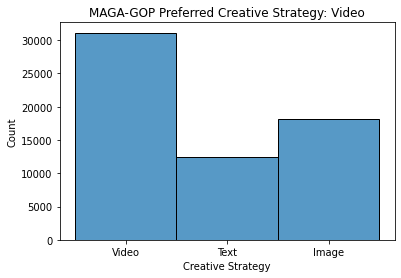

In [58]:
ax = sns.histplot(data=maga_gop_drumpf_file, x="Ad_Type")
ax.set_title('MAGA-GOP Preferred Creative Strategy: Video')
ax.set_xlabel('Creative Strategy')
plt.show()

In [88]:

#To estimate spending, we need to show the number of times for each 
#spend category applied for political ad (Advertiser_Name associated with Spend_USD)

maga_gop_drumpf_file.value_counts('Spend_USD')

Spend_USD
≤ 100       35786
100-1k      16036
1k-50k       9536
> 100k        198
50k-100k      179
dtype: int64

**Estimate on Spending**:
For an estimate on spending, I propose calculating a threshold where we calculate two sums: one at a minimum and one at a maximum. 
1.  Minimum Threshold: add up each minimum range at the lowest 'Spend_USD' column multiplied by the count for that category, and repeat for the remaining 4 categories ($100 from the $100-1k group; $1k from the 1k-50k group; $50k from the 50k-100k group, and 100,001 from the '>100k' group)
Minimum Threshold = ($1* 35,786) + ($100*16,036) + ($1000 * 9536) + ($50,000 * 179) + ($100,00 * 198)

2.   Maximum Threshold: Apply same process, but select the upper range: $100 from group 1; $1k from group 2; $50k from group 3; $100k from group 4; and use the 

Maximum Threshold: ($100* 35,786) + ($1000*16,036) + ($50000 * 9536) + ($100,000 * 179) + ($101,00 * 198)


**Visualization 2: US Dollars Spent by Groups Supporting MAGA Candidate**

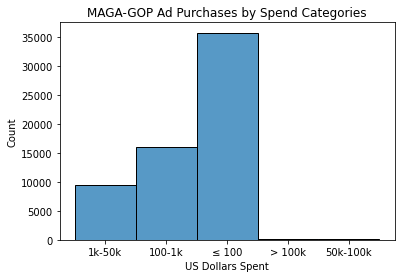

In [92]:
#Visualizaations
ax = sns.histplot(data=maga_gop_drumpf_file, x="Spend_USD")
ax.set_title('MAGA-GOP Ad Purchases by Spend Categories')
ax.set_xlabel('US Dollars Spent')
plt.show()

**Duration**:
How Long are they running ads?

In [59]:
maga_gop_drumpf_file.value_counts('Num_of_Days')

Num_of_Days
2.0      9419
1.0      6737
7.0      5601
3.0      4387
5.0      4065
         ... 
284.0       1
279.0       1
278.0       1
274.0       1
442.0       1
Length: 318, dtype: int64

Visualization 3 & 4: Highlighting Ad Types by Advertiser across Number of Days

KeyboardInterrupt: ignored

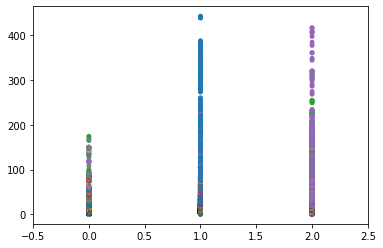

In [62]:
sns.swarmplot(x='Ad_Type',y='Num_of_Days', hue='Advertiser_Name',data=maga_gop_drumpf_file)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe861e9bdd0> (for post_execute):


KeyboardInterrupt: ignored

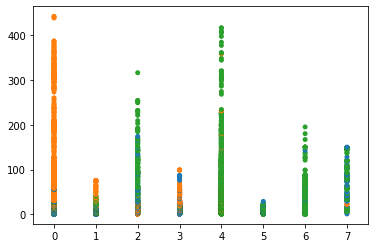

In [63]:
sns.swarmplot(x='Advertiser_Name',y='Num_of_Days', hue='Ad_Type',data=maga_gop_drumpf_file)


In [66]:
#Let's pinpoint the top 15 states receiving Geo-Targeted ads by MAGA-GOP and 
#And we will use to create a category for crosstab analysis by Advertiser Name
maga_gop_drumpf_file.value_counts('Geo_Targeting_Included').head(15)
#Skip first

Geo_Targeting_Included
United States                  13875
Georgia                         2819
Florida                         2356
Arizona                         2247
Iowa                            1902
Wisconsin                       1824
North Carolina                  1699
Pennsylvania                    1624
Michigan                        1446
Nevada                          1259
ME-2,Maine,United States        1225
Ohio                            1176
Not targeted                    1019
FL-26,Florida,United States      805
NE-2,Nebraska,United States      658
dtype: int64

In [81]:
#Summarize the Ad spent by Targeting area using Crosstab
#Define a list of geo-targeted areas we want to review

target = ['Georgia', 'Florida','Arizona','Iowa','Wisconsin','North Carolina',
'Pennsylvania','Michigan', 'Nevada', 'ME-2,Maine,United States','Ohio',
'Not targeted','FL-26,Florida,United States','NE-2,Nebraska,United States']

#Use the target_by_maga list to select top target 'geo' from Geo_Targeting_Included
# for copy of data
#df = df_raw[df_raw.make.isin(models)].copy()
target_by_maga = maga_gop_drumpf_file[maga_gop_drumpf_file.Geo_Targeting_Included.isin(target)].copy()
target_by_maga

,Ad_Campaigns_List,Ad_ID,Ad_Type,Ad_URL,Advertiser_ID,Advertiser_Name,Age_Targeting,Date_Range_End,Date_Range_Start,First_Served_Timestamp,Gender_Targeting,Geo_Targeting_Excluded,Geo_Targeting_Included,Impressions,Last_Served_Timestamp,Num_of_Days,Regions,Spend_Range_Max_USD,Spend_Range_Min_USD,Spend_USD
0,NaN,CR100017006501167104,Video,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2020-11-03,2020-11-02,2020-11-02T23:30:00Z,"Male, Female, Unknown gender","Alabama, Arkansas, California, Colorado, Conne...",Florida,10k-100k,2020-11-03T23:15:00Z,2.0,US,50000.0,1000.0,1k-50k
2,NaN,CR100022778937212928,Video,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2020-09-05,2020-09-01,2020-09-02T01:45:00Z,"Male, Female, Unknown gender",Not targeted,North Carolina,≤ 10k,2020-09-05T21:30:00Z,5.0,US,100.0,0.0,≤ 100
4,NaN,CR100064148062208000,Video,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.","35-44, 45-54, 55-64, ≥65",2020-08-19,2020-08-18,2020-08-18T19:45:00Z,Not targeted,Not targeted,Arizona,10k-100k,2020-08-19T15:45:00Z,2.0,US,1000.0,100.0,100-1k
5,NaN,CR100069576900870144,Text,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",Not targeted,2019-06-18,2019-06-18,2019-06-18T07:00:00Z,Not targeted,Not targeted,Georgia,≤ 10k,2019-06-18T07:00:00Z,1.0,US,100.0,0.0,≤ 100
6,NaN,CR100091223536041984,Video,https://transparencyreport.google.com/politica...,AR105500339708362752,"DONALD J. TRUMP FOR PRESIDENT, INC.",Not targeted,2020-10-07,2020-10-07,2020-10-07T17:30:00Z,Not targeted,Not targeted,Not targeted,≤ 10k,2020-10-07T17:30:00Z,1.0,US,100.0,0.0,≤ 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61729,NaN,CR95081367523557376,Image,https://transparencyreport.google.com/politica...,AR202327731696828416,"CLEARPATH ACTION FUND, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2018-10-31,2018-07-03,2018-07-03T07:00:00Z,"Male, Female, Unknown gender",Not targeted,Florida,100k-1M,2018-10-31T07:00:00Z,106.0,US,1000.0,100.0,100-1k
61731,NaN,CR9804345184878592,Image,https://transparencyreport.google.com/politica...,AR202327731696828416,"CLEARPATH ACTION FUND, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2018-11-05,2018-10-24,2018-10-24T07:00:00Z,"Male, Female, Unknown gender",Not targeted,"FL-26,Florida,United States",≤ 10k,2018-11-05T08:00:00Z,13.0,US,100.0,0.0,≤ 100
61732,NaN,CR98177592267374592,Image,https://transparencyreport.google.com/politica...,AR202327731696828416,"CLEARPATH ACTION FUND, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2018-11-01,2018-09-05,2018-09-05T07:00:00Z,"Male, Female, Unknown gender",Not targeted,Arizona,100k-1M,2018-11-01T07:00:00Z,58.0,US,50000.0,1000.0,1k-50k
61733,NaN,CR98331523895263232,Image,https://transparencyreport.google.com/politica...,AR202327731696828416,"CLEARPATH ACTION FUND, INC.","18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...",2018-07-10,2018-05-31,2018-05-31T07:00:00Z,"Male, Female, Unknown gender",Not targeted,"FL-26,Florida,United States",≤ 10k,2018-07-10T07:00:00Z,41.0,US,100.0,0.0,≤ 100


In [84]:
#Example pd.crosstab(df.make, df.body_style)
pd.crosstab(target_by_maga.Advertiser_Name, target_by_maga.Geo_Targeting_Included)

Geo_Targeting_Included,Arizona,"FL-26,Florida,United States",Florida,Georgia,Iowa,"ME-2,Maine,United States",Michigan,"NE-2,Nebraska,United States",Nevada,North Carolina,Not targeted,Ohio,Pennsylvania,Wisconsin
Advertiser_Name,,,,,,,,,,,,,,
"CLEARPATH ACTION FUND, INC.",67,378,86,0,0,0,47,0,23,0,0,0,0,0
"DONALD J. TRUMP FOR PRESIDENT, INC.",1442,0,1501,1399,1434,1158,1216,579,1004,1447,1000,1022,1450,1583
NRCC,0,72,0,0,0,26,0,69,0,0,3,0,0,0
NRSC,84,0,2,58,249,0,7,0,62,13,4,3,2,2
REPUBLICAN NATIONAL COMMITTEE,654,355,767,1362,219,41,176,10,170,239,12,151,172,239


We see that the most targeted geographics areas are most closely coordinated with these 5 Advertisers promoting MAGA candidates. In fact, we could use heatmap to show how the the NRCC, NRSC, and RNC execute a complimentary ad buy and coordinate a division of labor by splittiing up who spends the most in each target area, hence leveraging the superpac opportunity to coordinate because they do not have to follow the traditional PAC rules regarding coordination. Specifically, NRCC doesn't invest in states like Arizona, Florida, Georgia and IOw because they understand that NRSC will invest in those targeted areas instead. 

In [86]:
#Visualize sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),cmap="YlGnBu", annot=True, cbar=False)
sns.heatmap.pd.crosstab([target_by_maga.Advertiser_Name,target_by_maga.Geo_Targeting_Included], [target_by_maga.Ad_Type, target_by_maga.Spend_Range_Min_USD]),cmap="YlGnBu", annot=True, cbar=False)

SyntaxError: ignored

**Automation**
Automation Exercise 


*  *Extract & Store*
  * Report issuance yearly, then leverage Python. 
  * import module CSV
  * Create function "SearchByAdName"
  Ad_Name = input()
    * Write for loop regarding columns made to extract "Ad_Name" & 'Spend_USA' b/c we need to measure consistenly and will be cleaned for standardized feature
  * Create 2nd functioni to search by 'Geo_Target'
      * Insert for loop row in CSV

  *   (Source support: https://www.youtube.com/watch?v=7TOfPrOt2HE)
* *Load*
  * Upload into Python as CSV, but also store as Excel as backup

* Clean & Standardize for repeated use by:*
  * Organize and categorize age groups consistently that represent by "propensity to vote score" where we split college age (>22) and cap at Age where score significantly increases for next grouping
  * Join creative_stats data to geo_spend data set on Ad_Id column to capture 'Data Range' of when ad dropped
  * Join creative_stats data to weekly_spend on Ad_Id column to capture Election_Cycle column, which would highlight how midterm differs from presidential 

* *Tools for Weekly Shareable*: 
  * Tableau: For Director and Exec staff 
    * If Slack Group: Share KPI determined by Director/requested by Chelsea for broader PAC org consumption. 
    * Propose specific age group as KPI to track nationwide
  * Estimated Time = 
    * Extract: Released once a year, download, extract, and update data set= 1 week
    * Check if Uploads properly, if errors, add another week
    * Standardize Process: 1 week t report back to Director on initial data exploration to propose standardized columns needed for requested features foor visualizing data points
    * Data cleaning: 2 weeks
    * Tools: If non Tableau tool reqeuested, need 3-5 days to learn how to input features and visualize in preferred tool

*Guesstimated Time:* 4-6 weeks after each Google Report issued. Will reduce to 2-3 weeks once standardized process and selected KPI(s) to report are approved.